<a href="https://colab.research.google.com/github/Dawoon-Jeong0523/Science-of-Science/blob/main/Disruption_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disruption Index (CD Index)

The **Disruption Index (CD index)** was proposed in:  
**Funk, R. J., & Owen-Smith, J. (2017).** *A dynamic network measure of technological change.* Management Science, 63(3), 791–817.

## Paper Categories in Citation Network
1. **Papers in Nj (Green):**  
   These papers cite the **focal paper** and simultaneously cite the **reference** of the focal paper.
   
2. **Papers in Ni (Blue):**  
   These papers cite the **focal paper** but do **not** cite the reference of the focal paper.
   
3. **Papers in Nk (Brown):**  
   These papers do **not** cite the **focal paper** but cite the reference of the focal paper.


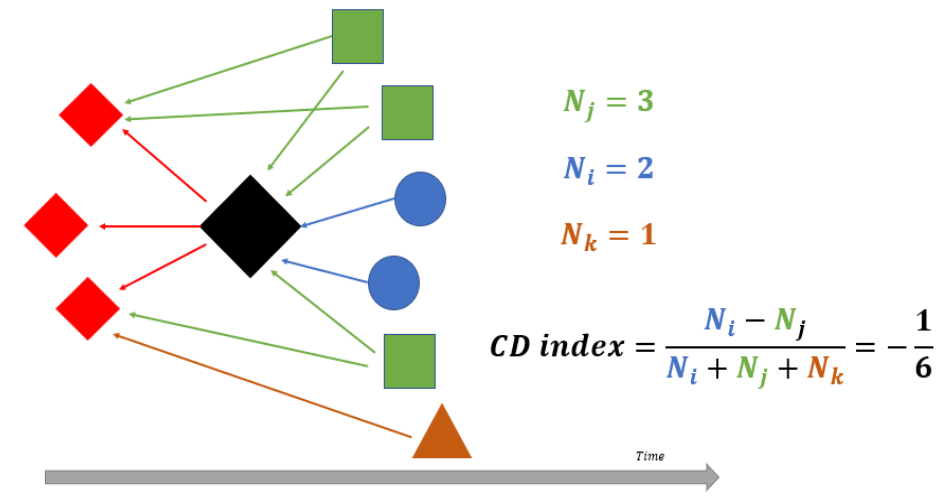

In [ ]:
dir = '/content/drive/MyDrive/Data/Pickle Data/'

In [ ]:
import pickle

with open(dir+r'/MAG/Pickles/backward_citations.pkl', 'rb') as f:
    backward_citations = pickle.load(f)
with open(dir+r'/MAG/Pickles/forward_citations.pkl', 'rb') as f:
    forward_citations = pickle.load(f)
with open(dir+r'/MAG/Pickles/PaperID2Year.pkl', 'rb') as f:
    PaperID2Year = pickle.load(f)

In [ ]:
def CD_index(Focal_PaperID, year_window):

    focal_year = int(PaperID2Year[Focal_PaperID])

    backward_Paper_ids = set(backward_citations[Focal_PaperID])
    forward_Paper_ids = []
    for Paper_id in backward_Paper_ids:
      if Paper_id in forward_citations.keys():
        forward_Paper_ids += forward_citations[Paper_id]
    if Focal_PaperID in forward_citations.keys():
      forward_Paper_ids += set(forward_citations[Focal_PaperID])
    forward_Paper_ids = list(set(forward_Paper_ids))
    forward_Paper_ids = [Paper_id for Paper_id in forward_Paper_ids if Paper_id in PaperID2Year.keys() if focal_year <= int(PaperID2Year[Paper_id]) if int(PaperID2Year[Paper_id]) <= focal_year + year_window]

    N_i = []
    N_j = []
    N_k = []

    temp_backwards_focal_set = set(backward_Paper_ids)

    for Paper_id in (forward_Paper_ids):
      if Paper_id in backward_citations.keys():
        temp_backwards = backward_citations[Paper_id]
      else:
        temp_backwards = set()
      if Paper_id in forward_citations.keys():
        temp_forwards = forward_citations[Paper_id]
      else:
        temp_forwards = set()
      if temp_backwards_focal_set.intersection(temp_backwards):
          if Focal_PaperID in temp_backwards:
              N_j.append(Paper_id)
          else:
              N_k.append(Paper_id)
      else:
          N_i.append(Paper_id)
    if (len(N_i) + len(N_j) + len(N_k)) == 0:
      cd_index = None
    else:
      cd_index = (len(N_i) - len(N_j)) / (len(N_i) + len(N_j) + len(N_k))

    return Focal_PaperID, N_i, N_j, N_k, cd_index

In [ ]:
import random

temp_ids = set(backward_citations.keys())
temp_ids = set(forward_citations).intersection(temp_ids)
temp_ids = set(PaperID2Year.keys()).intersection(temp_ids)

In [ ]:
from tqdm import tqdm
import pandas as pd

year_window = 5

temp_result_list = []
for Focal_Paper_ID in tqdm(temp_ids):
  temp_result = CD_index(Focal_Paper_ID, year_window)
  temp_result_list.append(temp_result)

Paper_df = pd.DataFrame(temp_result_list, columns=['Focal_Paper_ID', 'N_i', 'N_j', 'N_k', 'CD_index'])
Paper_df['Year'] = Paper_df['Focal_Paper_ID'].map(PaperID2Year)

100%|██████████| 100000/100000 [1:06:27<00:00, 25.08it/s]


In [ ]:
with open('/content/drive/MyDrive/Research/Knowledge Assemblies_Final/Data/Citation_Link.pkl', 'rb') as f:
  Citation_Link = pickle.load(f)

In [ ]:
len(Citation_Link)

733035496

In [ ]:
Citation_Link.head()

,Citing PaperID,Cited PaperID,Weight,Citing Year,Cited Year
0,3257311,2081707964,0,1900,1898
1,2081707964,2108169033,0,1898,1881
2,2081707964,2020492395,0,1898,1882
3,2081707964,1999870004,0,1898,1886
4,2081707964,2091461051,0,1898,1894


In [2]:
import pickle

with open('/content/drive/MyDrive/Research/Disruption index/Data/Paper_df_241215.pkl', 'rb') as f:
  Paper_df = pickle.load(f)

In [14]:
FOS_L0_color_dict = {
    'Chemistry': 'blue',
    'Medicine': 'red',
    'Physics': 'green',
    'Psychology': 'purple',
    'Biology': 'orange',
    'Computer science': 'cyan',
    'Materials science': 'magenta',
    'Art': 'brown',
    'Mathematics': 'pink',
    'Sociology': 'yellow',
    'Geology': 'teal',
    'Engineering': 'navy',
    'Geography': 'olive',
    'Philosophy': 'gray'
}
FOS_L0_color_dict['Others'] = 'grey'

In [11]:
FOS_list = list(Paper_df['Field of Study'].unique())

In [6]:
years = [year for year in range(1950,2016)]

In [7]:
temp_Paper_df = Paper_df[Paper_df['Year'].isin(years)]

In [8]:
temp_Paper_df.head()

,PaperID,Year,PPP,Impact,Disruption,Main FOS,Main FOS_L1,Main FOS_L0,PPP_binary,Field of Study,...,Nj,Nk,AuthorIDs,Number of Authors,Ni-Nj,Team Size,Hit_binary,Hit_paper,PatentCitation,Impact_Patent
0,2906390199,2004,Non-PPP,NaN,NaN,526734887.0,Environmental protection,Geography,0,Others,...,NaN,NaN,"[2100860639, 2990705859]",2,NaN,Small Team,0.0,Non-Hit paper,[],0
1,760496,2004,Non-PPP,2.0,NaN,22212356.0,Transport engineering,Engineering,0,Engineering,...,NaN,NaN,"[2100860639, 2990705859]",2,NaN,Small Team,0.0,Non-Hit paper,[],0
2,2789336,2008,Non-PPP,NaN,NaN,199360897.0,Programming language,Computer science,0,Computer science,...,NaN,NaN,"[1365476575, 2112271222]",2,NaN,Small Team,0.0,Non-Hit paper,[],0
3,2257060365,2009,Non-PPP,2.0,NaN,199360897.0,Programming language,Computer science,0,Computer science,...,NaN,NaN,"[1365476575, 2112271222]",2,NaN,Small Team,0.0,Non-Hit paper,[],0
4,9552966,2005,Non-PPP,0.0,0.0,98274493.0,Pharmacology,Biology,0,Biology,...,NaN,521.0,"[2042343425, 2311089193, 2690247746]",3,NaN,Small Team,0.0,Non-Hit paper,[],0


In [15]:
FOS_L0_color_dict.keys()

dict_keys(['Chemistry', 'Medicine', 'Physics', 'Psychology', 'Biology', 'Computer science', 'Materials science', 'Art', 'Mathematics', 'Sociology', 'Geology', 'Engineering', 'Geography', 'Philosophy', 'Others'])

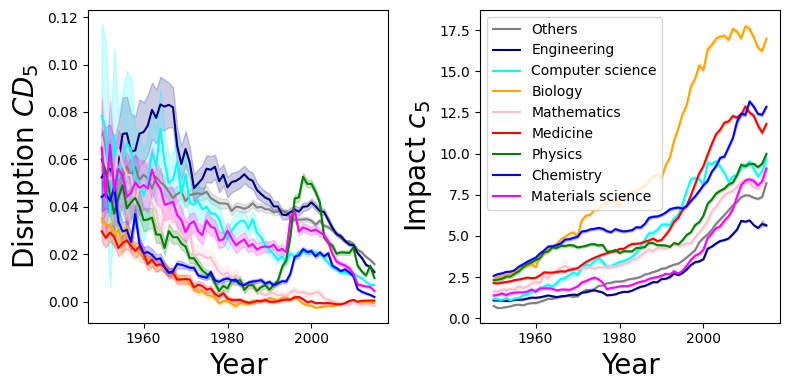

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x2 panel figure
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Set up a figure with 1 row and 2 columns

# Plot 1: Disruption over Years by Field of Study
sns.lineplot(
    data=temp_Paper_df,
    x='Year',
    y='Disruption',
    hue='Field of Study',
    palette=FOS_L0_color_dict,
    legend=False,
    ax=axes[0]
)

axes[0].set_xlabel('Year',fontsize=20)
axes[0].set_ylabel('Disruption $CD_5$',fontsize=20)

# Plot 2: Impact over Years by Field of Study
sns.lineplot(
    data=temp_Paper_df,
    x='Year',
    y='Impact',
    hue='Field of Study',
    palette=FOS_L0_color_dict,
    ax=axes[1]
)
axes[1].set_xlabel('Year',fontsize=20)
axes[1].set_ylabel('Impact $c_5$',fontsize=20)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
